In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
site_a = pd.read_csv('../data/site_a_emissions_results.csv', index_col=0)
site_d = pd.read_csv('../data/site_d_emissions_results.csv', index_col=0)
site_c = pd.read_csv('../data/site_c_emissions_results.csv', index_col=0)
site_b = pd.read_csv('../data/site_b_emissions_results.csv', index_col=0)

In [3]:
site_a.index = pd.to_datetime(site_a.index)
site_d.index = pd.to_datetime(site_d.index)
site_c.index = pd.to_datetime(site_c.index)
site_b.index = pd.to_datetime(site_b.index)

In [4]:
site_a_droplist = ['2021-05-18', '2021-06-23', '2021-09-21', '2021-09-30', '2021-09-30', '2021-10-26',
            '2022-03-12', '2022-03-13', '2022-03-14', '2022-03-15', '2022-03-16',
            '2022-03-23', '2022-04-04', '2022-04-05', '2022-10-21', '2022-10-22', 
            '2022-10-23', '2022-10-24', '2022-10-25']

site_d_droplist = ['20210426', '20210518', '20210623', '20211026', 
            '20211111', '20221025', '20221101', '20230105']

site_b_droplist = ['20210623', '20211026', '20221025', '20221101', '20230105']

site_c_droplist = ['20210623', '20221025', '20211026', '20221101', '20230105']

In [5]:
index = pd.date_range('20210301', '20230228').tz_localize('UTC')

In [6]:
df = pd.concat([site_a.drop(site_a_droplist).reindex(index),
                site_d.drop(site_d_droplist).reindex(index), 
                site_c.drop(site_c_droplist).reindex(index),
                site_b.drop(site_b_droplist).reindex(index)], axis=1).replace(0, np.nan)
df.columns = ['ERWH.site_a', 'HPWH.site_a', 'NGWH.site_a',
 'ERWH.site_d', 'HPWH.site_d', 'NGWH.site_d',
 'ERWH.site_c', 'HPWH.site_c', 'NGWH.site_c',
 'ERWH.site_b', 'HPWH.site_b', 'NGWH.site_b']

In [7]:
site_b

,ERWH,HPWH,NGWH
2021-02-12 00:00:00+00:00,1.089778,0.496163,0.523282
2021-02-13 00:00:00+00:00,5.210844,1.972409,2.508071
2021-02-14 00:00:00+00:00,5.234899,1.733180,2.509250
2021-02-15 00:00:00+00:00,5.263060,2.007223,2.543746
2021-02-16 00:00:00+00:00,0.673710,1.346697,0.466484
...,...,...,...
2023-05-15 00:00:00+00:00,3.724502,0.917607,1.894401
2023-05-16 00:00:00+00:00,3.938762,0.970874,2.004119
2023-05-17 00:00:00+00:00,4.585051,1.062243,2.227628
2023-05-18 00:00:00+00:00,4.757599,1.063942,2.248748


In [8]:
erwh_mean = df[df.columns[df.columns.str.startswith('ERWH')]].mean(axis=1)
ngwh_mean = df[df.columns[df.columns.str.startswith('NGWH')]].mean(axis=1)
hpwh_mean = df[df.columns[df.columns.str.startswith('HPWH')]].mean(axis=1)

In [9]:
erwh_droplist = ['20210501', '20210502', '20210519', '20210520', '20210521']
hpwh_droplist = ['20230105']

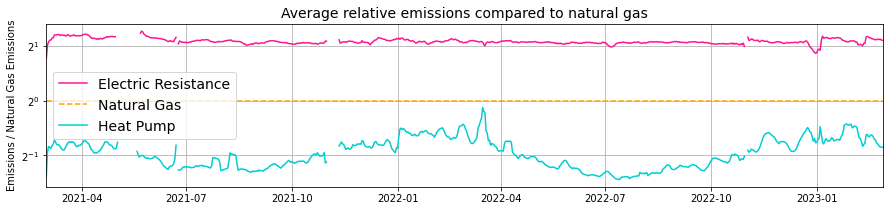

In [10]:

fig, ax = plt.subplots(figsize=(15, 3))

plt.semilogy(erwh_mean.drop(erwh_droplist).rolling('7d').mean()
         / ngwh_mean.drop(erwh_droplist).rolling('7d').mean(),
             c='deeppink', base=2, alpha=1, label='Electric Resistance')
plt.axhline(1, linestyle='--', c='orange', label='Natural Gas')
plt.semilogy(hpwh_mean.drop(hpwh_droplist).rolling('7d').mean() 
         / ngwh_mean.drop(hpwh_droplist).rolling('7d').mean(),
             c='darkturquoise', base=2, alpha=1, label='Heat Pump')

ax.set_xlim(pd.Timestamp('2021-03-01'), pd.Timestamp('2023-02-28'))
ax.grid(which='both', zorder=-5)
plt.title('Average relative emissions compared to natural gas', size=14)
plt.legend(fontsize=14)
plt.ylabel('Emissions / Natural Gas Emissions')
plt.savefig('../img/relative_emissions.png', dpi=200, bbox_inches='tight')

In [11]:
erwh_mean.mean()

2.8160530367694334

In [12]:
ngwh_mean.mean()

1.3316922271077174

In [13]:
hpwh_mean.mean()

0.7173287449972812

In [14]:
hpwh_mean.loc[hpwh_mean.index.month.isin([12, 1, 2])].mean()

1.1610506102221545

In [15]:
hpwh_mean.loc[hpwh_mean.index.month.isin([6, 7, 8])].mean()

0.4192478239884695

In [16]:
hpwh_mean.loc[hpwh_mean.index.month.isin([12, 1, 2])].mean() / ngwh_mean.mean()

0.871861070139174

In [17]:
hpwh_mean.loc[hpwh_mean.index.month.isin([6, 7, 8])].mean() / ngwh_mean.mean()

0.3148233619257714

In [18]:
erwh_mean.mean() / hpwh_mean.mean()

3.9257496042210143

In [19]:
ngwh_mean.mean() / hpwh_mean.mean()

1.8564601466134816

In [20]:
# Comparison of ERWH and HPWH

In [21]:
site_a['ERWH'].mean() / site_a['HPWH'].mean()

3.9456496743340157

In [22]:
site_d['ERWH'].mean() / site_d['HPWH'].mean()

3.8159825847510485

In [23]:
site_c['ERWH'].mean() / site_c['HPWH'].mean()

4.131836826270983

In [24]:
site_b['ERWH'].mean() / site_b['HPWH'].mean()

3.8531561933892227

In [25]:
# Comparison of NGWH and HPWH

In [26]:
site_a['NGWH'].mean() / site_a['HPWH'].mean()

2.029854310677693

In [27]:
site_d['NGWH'].mean() / site_d['HPWH'].mean()

1.79852318989395

In [28]:
site_c['NGWH'].mean() / site_c['HPWH'].mean()

1.872690157261602

In [29]:
site_b['NGWH'].mean() / site_b['HPWH'].mean()

1.8734961277876534

In [30]:
# Comparison of ERWH and NGWH

In [31]:
site_a['ERWH'].mean() / site_a['NGWH'].mean()

1.9438092938880474

In [32]:
site_d['ERWH'].mean() / site_d['NGWH'].mean()

2.1217310992670924

In [33]:
site_c['ERWH'].mean() / site_c['NGWH'].mean()

2.2063643631858927

In [34]:
site_b['ERWH'].mean() / site_b['NGWH'].mean()

2.0566662168334884

In [35]:
(site_a['ERWH'].mean() -  site_a['NGWH'].mean()) / site_a['NGWH'].mean()

0.9438092938880474

In [36]:
(site_c['ERWH'].mean() -  site_c['NGWH'].mean()) / site_c['NGWH'].mean()

1.2063643631858927